In [133]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u
from astropy import constants as astrocst
import pandas as pd
import scipy
import scipy.constants as cst
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# pd output style
pd.set_option('display.float_format','{:.6e}'.format)

In [134]:
# read in data
file_path = 'asu.tsv'

df = pd.read_csv(file_path, sep=";", comment='#', skiprows=1)
df.drop([0,1], inplace= True)
df.reset_index(inplace= True, drop=True)
df = df.astype(dtype = np.float64)

In [135]:
a = 8*np.power(cst.pi,5)*np.power(cst.k,4)/(15*np.power(cst.c,3)*np.power(cst.h,3))
df['muc'] = np.divide(1,np.multiply(df['Xc'],2) + np.multiply(df['Yc'],0.75))
df['Tc'] = np.power(10, df['logTc'])
df['rhoc'] = np.power(10, df['log(rhoc)'])*1000
df['ratio'] = np.divide(np.multiply(df['muc'], np.power(df['Tc'], 3)), df['rhoc'])*a/(3*cst.R)
df

,Mini,log(rhoc),logTc,Xc,Yc,muc,Tc,rhoc,ratio
0,8.000000e-01,1.898000e+00,7.061000e+00,7.167000e-01,2.691000e-01,6.115366e-01,1.150800e+07,7.906786e+04,3.575346e-01
1,9.000000e-01,1.903000e+00,7.098000e+00,7.169000e-01,2.688000e-01,6.114712e-01,1.253141e+07,7.998343e+04,4.563222e-01
2,1.000000e+00,1.910000e+00,7.130000e+00,7.162000e-01,2.694000e-01,6.118266e-01,1.348963e+07,8.128305e+04,5.604333e-01
3,1.100000e+00,1.923000e+00,7.161000e+00,7.168000e-01,2.687000e-01,6.115740e-01,1.448772e+07,8.375293e+04,6.735109e-01
4,1.250000e+00,1.933000e+00,7.199000e+00,7.169000e-01,2.687000e-01,6.114992e-01,1.581248e+07,8.570378e+04,8.556408e-01
5,1.350000e+00,1.937000e+00,7.226000e+00,7.170000e-01,2.686000e-01,6.114525e-01,1.682674e+07,8.649679e+04,1.021547e+00
6,1.500000e+00,1.934000e+00,7.261000e+00,7.170000e-01,2.686000e-01,6.114525e-01,1.823896e+07,8.590135e+04,1.309961e+00
7,1.700000e+00,1.913000e+00,7.298000e+00,7.169000e-01,2.687000e-01,6.114992e-01,1.986095e+07,8.184648e+04,1.775381e+00
8,2.000000e+00,1.864000e+00,7.336000e+00,7.169000e-01,2.688000e-01,6.114712e-01,2.167704e+07,7.311391e+04,2.583876e+00
9,2.500000e+00,1.768000e+00,7.374000e+00,7.170000e-01,2.686000e-01,6.114525e-01,2.365920e+07,5.861382e+04,4.190427e+00


Text(0.5, 1.0, 'Plot of $P_{rad}/P_{gas}$ versus $M_{ini}$')

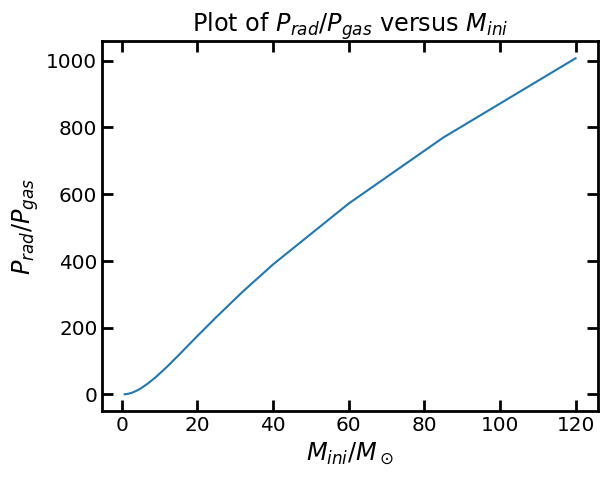

In [136]:
plt.plot(df['Mini'], df['ratio'])
plt.ylabel(r'$P_{rad}/P_{gas}$')
plt.xlabel(r'$M_{ini}/M_\odot$')
plt.title(r'Plot of $P_{rad}/P_{gas}$ versus $M_{ini}$')

In [137]:
def saha(T, n_e):
    denominator = 1+ n_e*(np.power(2*cst.pi*cst.electron_mass*cst.k*T/np.power(cst.h,2),-3/2.0)*np.exp(13.605*cst.electron_volt/cst.k/T))
    return 1/(denominator)

Text(0.5, 1.0, 'Plot of $T$ versus $n_{II}/n_{H}$')

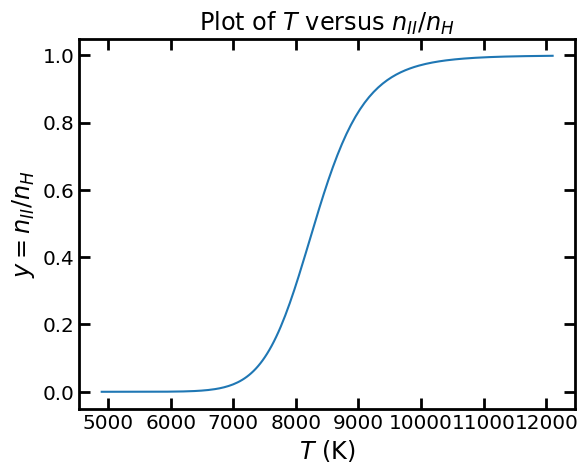

In [138]:
T = np.linspace(4.9e3,1.21e4,200)
y = saha(T, 1e19)
plt.plot(T,y)
plt.ylabel(r'$y = n_{II}/n_{H}$')
plt.xlabel(r'$T$ (K)')
plt.title(r'Plot of $T$ versus $n_{II}/n_{H}$')